In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Demo\Data\Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data['size'].fillna(value=data['size'].mode, inplace = True)
data['bath'].fillna(method='ffill', inplace = True)
data['balcony'].fillna(method='ffill', inplace = True)
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

In [8]:
data = data.drop(columns = ['society','availability'])

In [9]:
data['location'] = LabelEncoder().fit_transform(data['location'])

In [10]:
data.isnull().sum()

area_type       0
location        0
size            0
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13073 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13073 non-null  object 
 1   location    13073 non-null  int32  
 2   size        13073 non-null  object 
 3   total_sqft  13073 non-null  float64
 4   bath        13073 non-null  float64
 5   balcony     13073 non-null  float64
 6   price       13073 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 766.0+ KB


In [14]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,419,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,317,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,1179,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,757,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,716,2 BHK,1200.0,2.0,1.0,51.00


In [15]:
data.describe()

,location,total_sqft,bath,balcony,price
count,13073.000000,13073.000000,13073.000000,13073.000000,13073.000000
mean,671.660063,1554.942029,2.691808,1.605523,112.528441
std,364.823469,1238.458773,1.335689,0.805651,149.679557
min,0.000000,1.000000,1.000000,0.000000,8.000000
25%,397.000000,1100.000000,2.000000,1.000000,50.000000
50%,654.000000,1275.000000,2.000000,2.000000,72.000000
75%,996.000000,1670.000000,3.000000,2.000000,120.000000
max,1305.000000,52272.000000,40.000000,3.000000,3600.000000


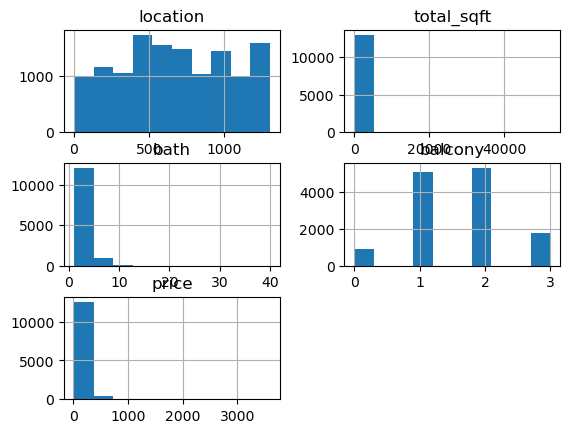

In [16]:
data.hist()
plt.show()

In [17]:
data.value_counts()

area_type             location  size       total_sqft  bath  balcony  price 
Super built-up  Area  506       2 BHK      1243.0      2.0   2.0      46.00     16
Plot  Area            1138      3 Bedroom  1200.0      2.0   0.0      66.00     12
Super built-up  Area  304       1 BHK      645.0       1.0   1.0      16.45     11
                      494       2 BHK      1140.0      2.0   2.0      46.00      9
                      506       2 BHK      1194.0      2.0   2.0      47.00      8
                                                                                ..
Plot  Area            1156      2 Bedroom  2100.0      1.0   1.0      200.00     1
                                5 Bedroom  1200.0      4.0   2.0      115.00     1
                      1160      5 Bedroom  1200.0      5.0   0.0      195.00     1
                      1161      1 Bedroom  800.0       1.0   1.0      100.00     1
Super built-up  Area  1305      3 BHK      1600.0      3.0   2.0      86.00      1
Name: coun

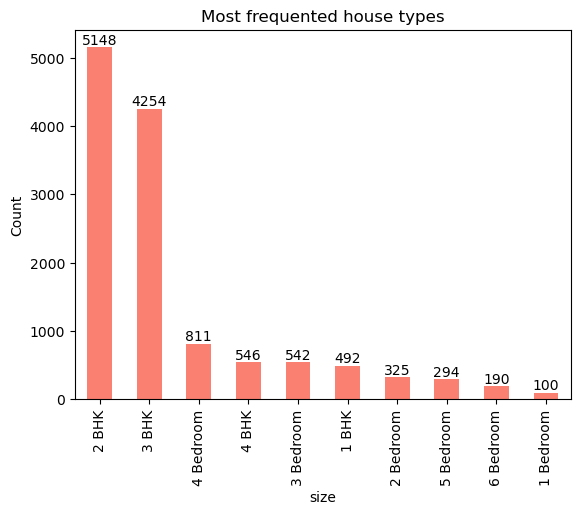

In [18]:
h_size = data['size'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 
for p in h_size.patches:
    h_size.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')
plt.title('Most frequented house types')
plt.ylabel('Count')
plt.show()

In [19]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8602
Built-up  Area          2391
Plot  Area              1999
Carpet  Area              81
Name: count, dtype: int64

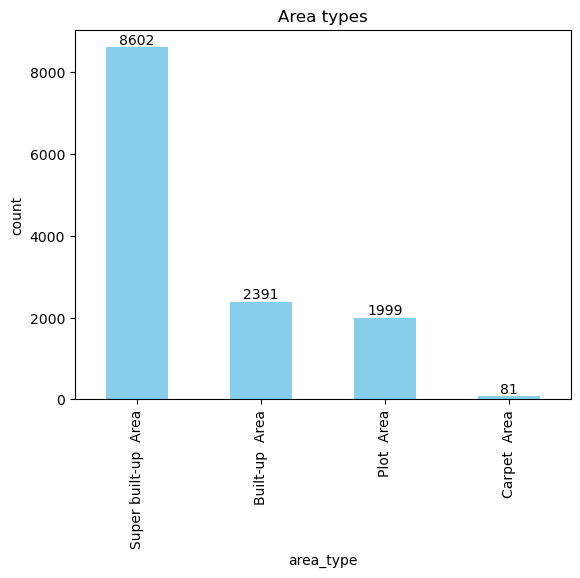

In [20]:
at=data['area_type'].value_counts().plot(kind='bar',color='skyblue')
for p in at.patches:
    at.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Area types')
plt.ylabel('count')
plt.show()

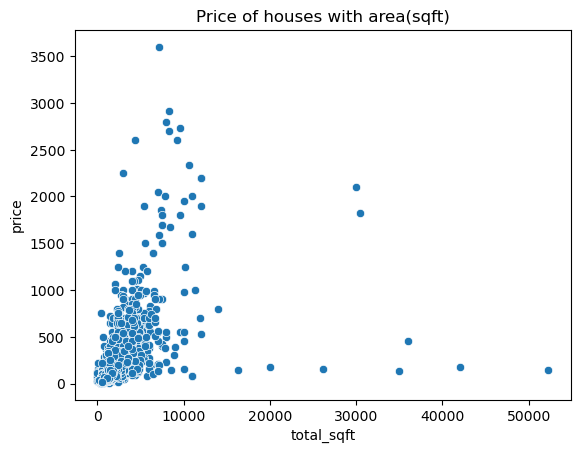

In [21]:
sns.scatterplot(x='total_sqft', y='price', data=data)  
plt.title('Price of houses with area(sqft)')
plt.xlabel('total_sqft')
plt.ylabel('price')  
plt.show()

In [22]:
data['total_sqft'].describe()

count    13073.000000
mean      1554.942029
std       1238.458773
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1670.000000
max      52272.000000
Name: total_sqft, dtype: float64

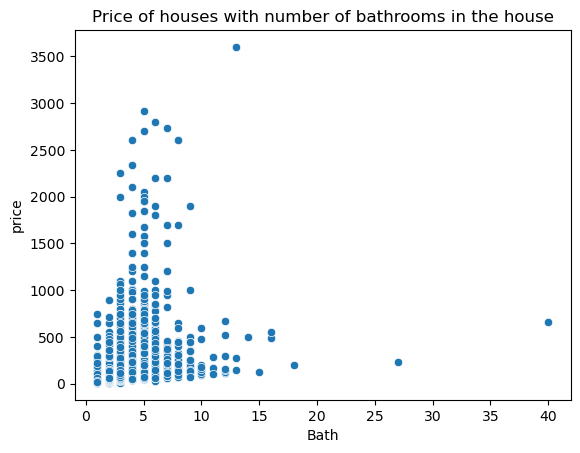

In [23]:
sns.scatterplot(x='bath', y='price', data=data)  
plt.title('Price of houses with number of bathrooms in the house')
plt.xlabel('Bath')
plt.ylabel('price')  
plt.show()

In [24]:
data.loc[data['bath'] >= 17.5, 'bath'] = np.nan

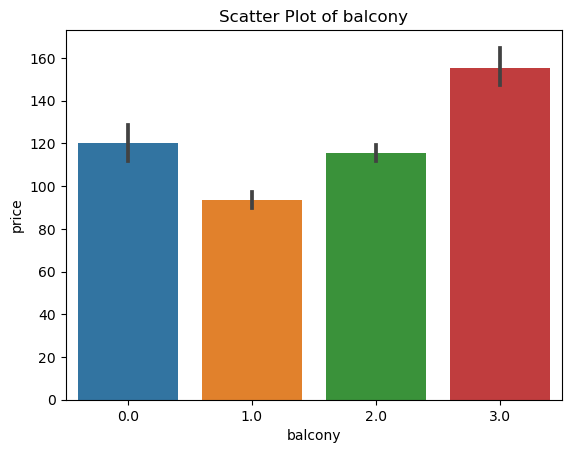

In [25]:
sns.barplot(x='balcony', y='price', data=data)  
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()

In [26]:
data.drop(columns='area_type', inplace=True)
data.drop(columns='location', inplace=True)

In [27]:
data.drop(columns='size', inplace=True)

In [28]:
data

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,0.0,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [29]:
data.isnull().sum()

total_sqft    0
bath          3
balcony       0
price         0
dtype: int64

In [30]:
data.dropna(inplace=True)


In [31]:
data['sqft_price']=data['total_sqft']*data['price']

In [32]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
scaled = pd.DataFrame(scaled, columns=data.columns)

In [33]:
data=scaled.copy()

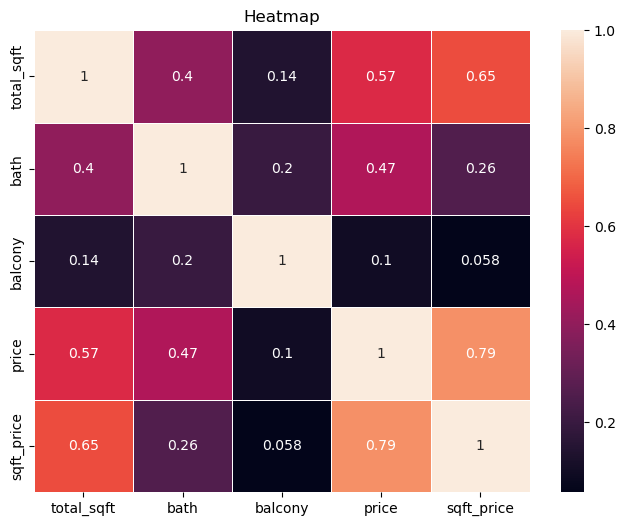

In [46]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.title('Heatmap')
plt.show()

In [35]:
X = data.drop(['price'],axis='columns')
y = data.price

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [38]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [39]:
lr_clf.score(X_train,y_train)

0.7126066258617918

In [40]:
lr_clf.score(X_test,y_test)

0.6048883519430994

In [41]:
y_pred=lr_clf.predict(X_test)

In [42]:
y_pred

array([0.02747028, 0.01780202, 0.01755567, ..., 0.03005622, 0.01708814,
       0.02098207])

In [43]:

result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.014749,0.027470
1,0.018653,0.017802
2,0.011790,0.017556
3,0.027004,0.038497
4,0.008878,0.017067
...,...,...
3263,0.009048,0.017087
3264,0.095212,0.082635
3265,0.031180,0.030056
3266,0.009059,0.017088


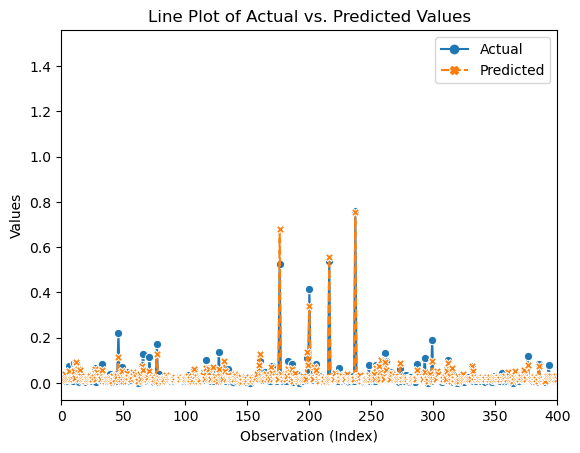

In [44]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr_clf.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr_clf.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  0.010157065017185057
R-squared (coefficient of determination) score is : 63.63%
Accuracy for Training: 71.26%
Accuracy for Testing: 60.49%
